# Testing Different Datasets
Currently Testing:
1. First Rate Data
2. Polygon.io Data
3. IB Direct Stock Data

And the goal is to see how closely the first two datasets match the IB direct stock data

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Getting other functions in for cleanup

In [10]:
def get_true_timestamp_and_set_as_index(pd_csv_ticker_1min):
    # Converting timestamp to actual timestamp
    pd_csv_ticker_1min['timestamp'] = pd.to_datetime(pd_csv_ticker_1min['timestamp'])
    
    # Setting the index to the timestamp
    pd_csv_ticker_1min.set_index('timestamp', inplace=True)

    return pd_csv_ticker_1min

def fill_missing_minutes(index_timestamp_1_min, keep_only_PM_to_TD = False):
    index_timestamp_1_min = index_timestamp_1_min.resample('min').asfreq()

    # Filling in NaN values (volume with 0 and close to the last known close)
    index_timestamp_1_min['volume'] = index_timestamp_1_min['volume'].fillna(0);
    index_timestamp_1_min['close'] = index_timestamp_1_min['close'].ffill();
    
    # Filling in the rest, with the NaN being equal to the previous close
    index_timestamp_1_min['open'] = index_timestamp_1_min['open'].fillna(index_timestamp_1_min['close']);
    index_timestamp_1_min['high'] = index_timestamp_1_min['high'].fillna(index_timestamp_1_min['close']);
    index_timestamp_1_min['low'] = index_timestamp_1_min['low'].fillna(index_timestamp_1_min['close']);
    
    # Making sure there are only weekdays
    index_timestamp_1_min = index_timestamp_1_min[index_timestamp_1_min.index.weekday < 5]

    # Keeping only data from 4:00am to 3:59pm (if keep_only_PM_to_TD is True)
    if keep_only_PM_to_TD:
        index_timestamp_1_min = index_timestamp_1_min.between_time('4:00', '15:59')

    return index_timestamp_1_min

def upper_case_OHLCV(no_missing_1_min):
    no_missing_1_min.rename(columns = {'open':'Open', 'high':'High', 'low':'Low', 'close':'Close', 'volume':'Volume'}, inplace = True)

    return no_missing_1_min

# Reading csv files

In [43]:
# Loading in First Rate csv file data
FRD_MSFT_path = '../frd_stock_sample/MSFT_1min_sample.csv'
FRD_MSFT_1min = pd.read_csv(FRD_MSFT_path)

FRD_MSFT_1min = get_true_timestamp_and_set_as_index(FRD_MSFT_1min)
FRD_MSFT_1min = fill_missing_minutes(FRD_MSFT_1min, True)
FRD_MSFT_1min = upper_case_OHLCV(FRD_MSFT_1min)

In [12]:
# Loading in df_3y_10tickers dataset from Polygon.io
Polygon_3y_path = '../df_3y_10tickers.csv'

Polygon_test_1min = pd.read_csv(Polygon_3y_path)
Poly_MSFT_1min = Polygon_test_1min[Polygon_test_1min['ticker'] == 'MSFT']
Poly_MSFT_1min = Poly_MSFT_1min.rename(
    columns = {'t':'timestamp', 'o':'open', 'h':'high', 'l':'low', 'c':'close', 'v':'volume'})
Poly_MSFT_1min = Poly_MSFT_1min.drop(columns=['Unnamed: 0', 'index', 'vw', 'n', 'ticker'])

Poly_MSFT_1min = get_true_timestamp_and_set_as_index(Poly_MSFT_1min)
Poly_MSFT_1min = fill_missing_minutes(Poly_MSFT_1min, True)
Poly_MSFT_1min = upper_case_OHLCV(Poly_MSFT_1min)

Poly_MSFT_1min = Poly_MSFT_1min['2024-07-15':'2024-07-29']

In [38]:
# Loading in IB csv file data
IB_path = '../stocks_IBapi_5M_1min.csv'
IB_1min = pd.read_csv(IB_path)
IB_MSFT_1min = IB_1min[IB_1min['ticker'] == 'MSFT']
IB_MSFT_1min = IB_MSFT_1min.rename(
    columns = {'Date':'timestamp'})
IB_MSFT_1min = IB_MSFT_1min.drop(columns=['Unnamed: 0', 'ticker'])

IB_MSFT_1min = get_true_timestamp_and_set_as_index(IB_MSFT_1min)
IB_MSFT_1min = IB_MSFT_1min['2024-07-15':'2024-07-29']

# Checking to see if they're all the same format

In [40]:
IB_MSFT_1min

,Open,High,Low,Close,Volume
timestamp,,,,,
2024-07-15 04:00:00,454.97,454.99,454.97,454.99,200
2024-07-15 04:01:00,455.00,455.00,454.99,455.00,2015
2024-07-15 04:02:00,455.00,455.00,455.00,455.00,0
2024-07-15 04:03:00,455.00,455.00,455.00,455.00,0
2024-07-15 04:04:00,455.00,455.00,455.00,455.00,0
...,...,...,...,...,...
2024-07-29 15:55:00,427.64,427.65,426.79,426.87,81056
2024-07-29 15:56:00,426.87,426.96,426.71,426.84,49067
2024-07-29 15:57:00,426.81,426.93,426.70,426.88,65137


In [41]:
Poly_MSFT_1min

,Open,High,Low,Close,Volume
timestamp,,,,,
2024-07-15 04:00:00,454.97,454.99,454.97,454.99,1190.0
2024-07-15 04:01:00,455.00,455.00,454.99,455.00,2356.0
2024-07-15 04:02:00,455.00,455.00,455.00,455.00,0.0
2024-07-15 04:03:00,455.00,455.00,455.00,455.00,0.0
2024-07-15 04:04:00,455.00,455.00,455.00,455.00,0.0
...,...,...,...,...,...
2024-07-29 15:55:00,427.64,427.65,426.79,426.87,141355.0
2024-07-29 15:56:00,426.87,426.96,426.71,426.84,97700.0
2024-07-29 15:57:00,426.81,426.93,426.70,426.88,112591.0


In [44]:
FRD_MSFT_1min

,Open,High,Low,Close,Volume
timestamp,,,,,
2024-07-15 04:00:00,454.97,454.9900,454.970,454.990,200.0
2024-07-15 04:01:00,455.00,455.0000,454.990,455.000,2015.0
2024-07-15 04:02:00,455.00,455.0000,455.000,455.000,0.0
2024-07-15 04:03:00,455.00,455.0000,455.000,455.000,0.0
2024-07-15 04:04:00,455.00,455.0000,455.000,455.000,0.0
...,...,...,...,...,...
2024-07-29 15:55:00,427.64,427.6500,426.790,426.870,81056.0
2024-07-29 15:56:00,426.87,426.9600,426.710,426.840,49067.0
2024-07-29 15:57:00,426.81,426.9300,426.700,426.875,65137.0


# Comparison Analysis

In [121]:
# Combining dfs
combined_df_full = pd.concat([FRD_MSFT_1min['Volume'], Poly_MSFT_1min['Volume'], IB_MSFT_1min['Volume']], axis=1)
combined_df_full.columns = ['FRD', 'Poly', 'IB']  # Rename columns for clarity

# Filter for specific time
start_time = '2024-07-15 04:00:00'
end_time = '2024-07-15 12:00:00'
combined_df = combined_df_full[start_time:end_time]

# Smoothing it out
smoothed_df = combined_df.rolling(window=5).mean()

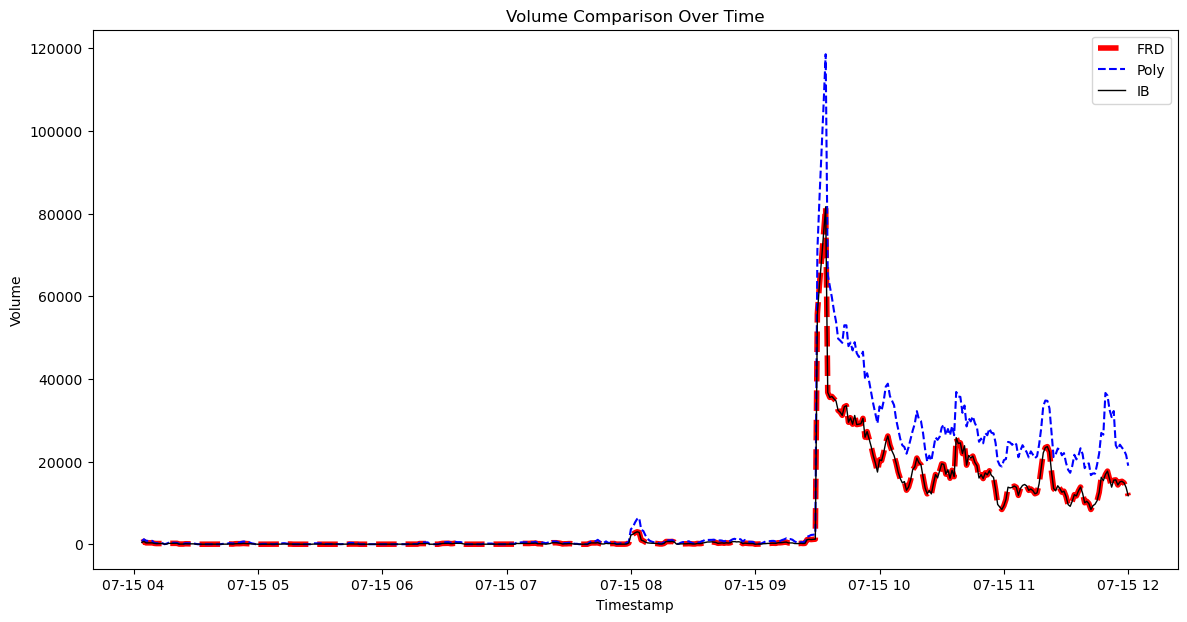

In [122]:
plt.figure(figsize=(14, 7))
plt.plot(smoothed_df['FRD'], label='FRD', linestyle='--', linewidth=4, color = 'red')
plt.plot(smoothed_df['Poly'], label='Poly', linestyle='--', linewidth=1.5, color = 'blue')
plt.plot(smoothed_df['IB'], label='IB', linestyle='-', linewidth=1, color = 'black')

plt.title('Volume Comparison Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [123]:
# Getting some statistics for % difference
combined_df_full['FRD_vs_IB_%'] = ((combined_df_full['FRD'] - combined_df_full['IB']) / combined_df_full['IB']) * 100
combined_df_full['Poly_vs_IB_%'] = ((combined_df_full['Poly'] - combined_df_full['IB']) / combined_df_full['IB']) * 100

summary = combined_df_full[['FRD_vs_IB_%', 'Poly_vs_IB_%']].describe()
summary

,FRD_vs_IB_%,Poly_vs_IB_%
count,5955.000000,5955.000000
mean,-0.002743,118.055304
std,3.225089,207.448837
min,-100.000000,0.000000
25%,0.000000,49.023993
50%,0.000000,66.866867
75%,0.000000,105.203933
max,90.319851,8556.881617
